## Obtain Data

### Importing Required libraries

In [89]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline



### Reading Data From CSV File

In [90]:
td=pd.read_csv("train.csv")

## Analyze The Data

In [91]:
td.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



## Data Visualization

In [92]:
td['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

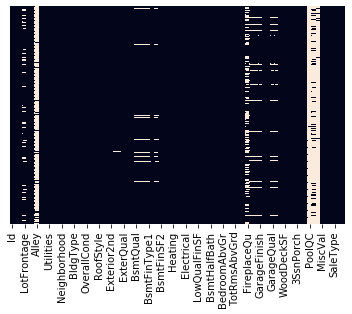

In [93]:
sb.heatmap(td.isnull(),yticklabels=False,cbar=False)

In [94]:
td.shape

(1460, 81)

In [95]:
td.info()
td.columns[td.isnull().any()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [96]:
tdcorr = td.select_dtypes(include=[np.number])
tdcorr.shape

(1460, 38)

#### Visualizing Top 50% Correlation Train
#### Attributes With The SalePrice

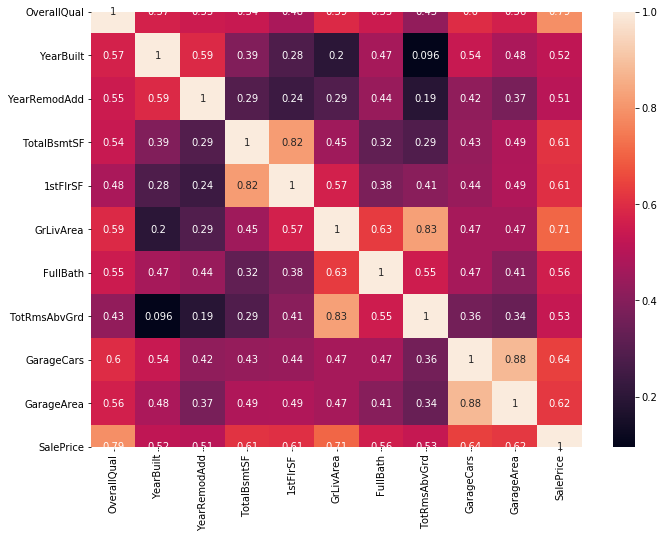

In [97]:
del tdcorr['Id']
corr = tdcorr.corr()
topattr = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(11, 8))
topcorr = td[topattr].corr()
sb.heatmap(topcorr, annot=True)
plt.show()

In [98]:
print("the most important attributes relative to target")
corr = td.corr()
corr.sort_values(['SalePrice'], ascending=False, inplace=True)
corr.SalePrice

the most important attributes relative to target


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

## Feature Engineering 
#### Filling The missing Values In The Data

In [99]:

td['PoolQC'] = td['PoolQC'].fillna('None')

In [100]:
td['MiscFeature'] = td['MiscFeature'].fillna('None')
td['Alley'] = td['Alley'].fillna('None')
td['Fence'] = td['Fence'].fillna('None')
td['FireplaceQu'] = td['FireplaceQu'].fillna('None')

In [101]:
td['LotFrontage'] = td.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [102]:
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    td[col] = td[col].fillna('None')
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    td[col] = td[col].fillna(int(0))
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    td[col] = td[col].fillna('None')
#MasVnrArea : replace with zero
td['MasVnrArea'] = td['MasVnrArea'].fillna(int(0))
#MasVnrType : replace with None
td['MasVnrType'] = td['MasVnrType'].fillna('None')
#There is put mode value 
td['Electrical'] = td['Electrical'].fillna(td['Electrical']).mode()[0]
#There is no need of Utilities
td = td.drop(['Utilities'], axis=1)

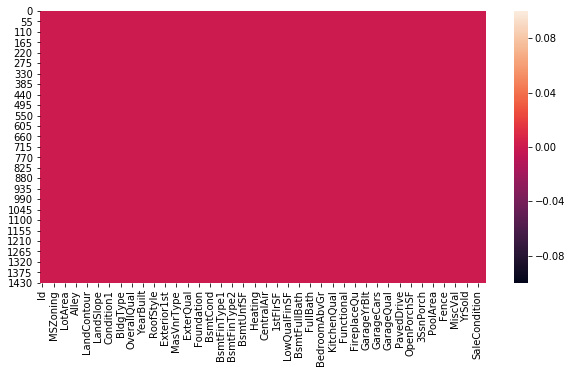

In [103]:
plt.figure(figsize=(10, 5))
sb.heatmap(td.isnull())

In [104]:
colmn = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
        'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'GarageType', 'MiscFeature', 
        'SaleType', 'SaleCondition', 'Electrical', 'Heating')
len(colmn)

47

### Encoding String To Integer Using LabelEncoder

In [105]:
from sklearn.preprocessing import LabelEncoder
for i in colmn:
    lb = LabelEncoder() 
    lb.fit(list(td[i].values)) 
    td[i] = lb.transform(list(td[i].values))

In [106]:
#Take targate variable into y
y = td['SalePrice']
#Delete the saleprice
del td['SalePrice']
#Take their values in X and y
X = td.values
y = y.values


## Train-Test Split

In [107]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


### Training The Model

In [108]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()
#Fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
print("Predict value " + str(model.predict([X_test[131]])))
print("Real value " + str(y_test[131]))

Predict value [142615.70184425]
Real value 136900


In [110]:
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  86.26650707450872


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)
#Fit
model.fit(X_train, y_train)

In [ ]:
print("Accuracy --> ", model.score(X_test, y_test)*100)

## Predicting The Model Using-
#### => Linear Regression
#### => Random Forest Regression
####  =>Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradboost = GradientBoostingRegressor(n_estimators=100, max_depth=4)
#Fit
gradboost.fit(X_train, y_train)

In [ ]:
print("Accuracy --> ", gradboost.score(X_test, y_test)*100)

In [ ]:
pred=gradboost.predict(X)

In [ ]:
pred
len(pred)

### Submitting The Predicted Result

In [ ]:
predi=pd.DataFrame(pred[:-1])
sd=pd.read_csv('sample_submission.csv')
submit=pd.concat([sd['Id'],predi],axis=1)
submit.columns=['Id','SalePrice']
submit.to_csv('result1.csv',index=False)